# Laboratorium 2 - Regresja liniowa

### Regresja liniowa jednej zmiennej

In [55]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

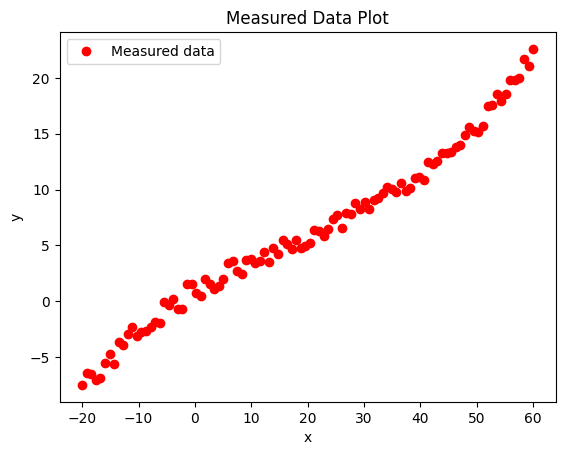

In [56]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    m_data = [row for row in csvreader]
    m_data = np.array(m_data, dtype=np.float32)

# Plot the data
plt.plot(m_data[:,0], m_data[:,1], 'ro', label='Measured data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Measured Data Plot')
plt.legend()
plt.show()

In [57]:
def h_fun1(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + theta_1 * x

def calculate_cost1(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = len(x)
    predictions = h_fun1(x, theta_0, theta_1)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

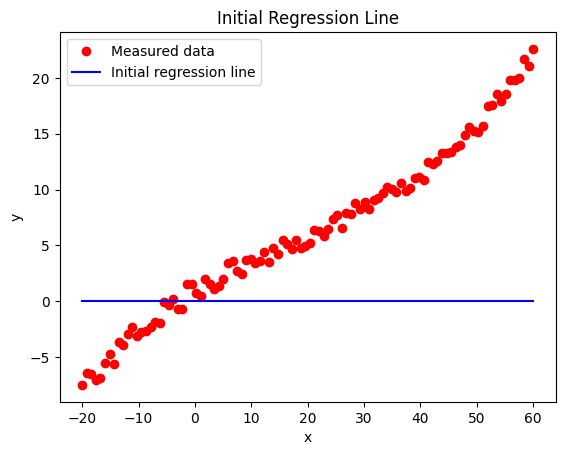

In [58]:
x = m_data[:, 0]
y = m_data[:, 1]

eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

initial_predictions = h_fun1(x, theta_0, theta_1)
plt.plot(x, y, 'ro', label='Measured data')
plt.plot(x, initial_predictions, 'blue', label='Initial regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Regression Line')
plt.legend()
plt.show()

Optimized theta_0: 0.006487626116722822
Optimized theta_1: 0.3153841495513916
Final cost: 0.6391740441322327


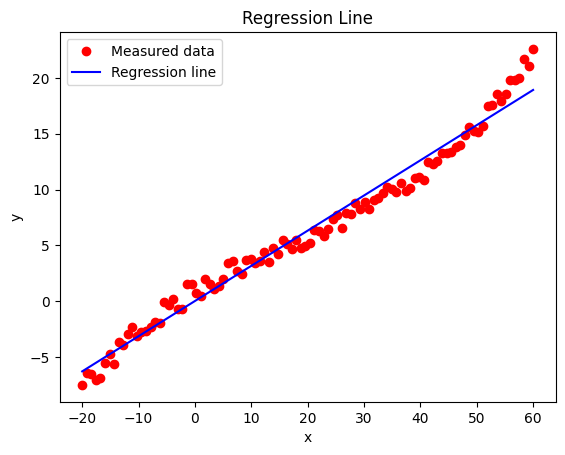

In [59]:
previous_cost = float('inf')
current_cost = calculate_cost1(x, y, theta_0, theta_1)

while abs(previous_cost - current_cost) > eps:
    gradient_theta_0 = np.sum(h_fun1(x, theta_0, theta_1) - y) / len(y)
    gradient_theta_1 = np.sum((h_fun1(x, theta_0, theta_1) - y) * x) / len(y)
    
    theta_0 = theta_0 - alpha * gradient_theta_0
    theta_1 = theta_1 - alpha * gradient_theta_1
    
    previous_cost = current_cost
    current_cost = calculate_cost1(x, y, theta_0, theta_1)

print(f'Optimized theta_0: {theta_0}')
print(f'Optimized theta_1: {theta_1}')
print(f'Final cost: {current_cost}')

initial_predictions = h_fun1(x, theta_0, theta_1)
plt.plot(x, y, 'ro', label='Measured data')
plt.plot(x, initial_predictions, 'blue', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

### Regresja wielu zmiennych

In [60]:
def h_fun2(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X # przykładowa realizacja, @ - mnożenie macierzowe
 
def calculate_cost2(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = X.shape[1]  # liczba próbek
    predictions = h_fun2(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, eps):
    m = X.shape[1]
    f_curr = calculate_cost2(X, y, theta)
    f_prev = float('inf')
    while f_prev - f_curr > eps:
        h_values = (h_fun2(X, theta) - y)
        theta_der = h_values @ X.T
        theta = theta - alpha * theta_der.T / m
        f_prev = f_curr
        f_curr = calculate_cost2(X, y, theta)
    return theta

Optimized theta 1: [0.00648763]
Optimized theta 2: [0.31538416]
Final cost: 0.6391738572130962


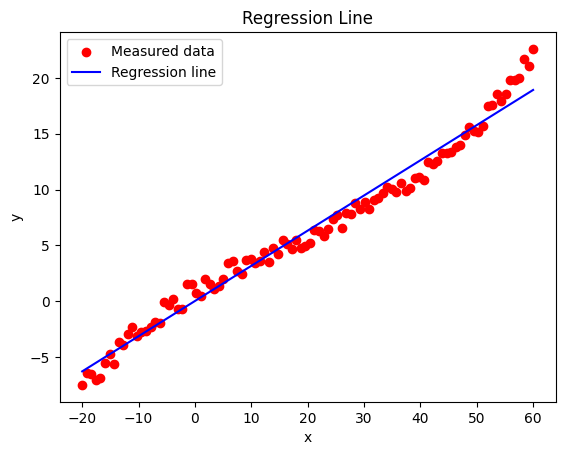

In [61]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta = np.array([[0], [0]])  # wartości początkowe parametrów modelu

X = np.vstack([np.ones(x.shape), x])  # dodanie kolumny 1 do X
y.shape = [1, -1]  # przekształcamy y do formatu (1, m)

theta = gradient_descent(X, y, theta, alpha, eps)

y_pred = theta[0] + theta[1] * x  # przewidywania na podstawie wyuczonych parametrów

print(f'Optimized theta 1: {theta[0]}')
print(f'Optimized theta 2: {theta[1]}')
print(f'Final cost: {calculate_cost2(X, y, theta)}')


plt.scatter(x, y, label='Measured data', color='red')
plt.plot(x, y_pred, 'blue', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

In [62]:
# Wczytanie danych
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    housing_data = [row for row in csvreader]
    housing_data = np.array(housing_data, dtype=np.float32)
    y = housing_data[:, 2]
    y.shape = [1, y.shape[0]]
    X = housing_data[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta = np.zeros((X.shape[0], 1))  # - wartości początkowe parametrów modelu

theta = gradient_descent(X, y, theta, alpha, eps)

example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'Koszt nieruchomośi o powierzchni {example[1][0]} z liczbą pokoi równą: {example[2][0]}, oszacowano na {h_example[0][0]}')

Koszt nieruchomośi o powierzchni 1300 z liczbą pokoi równą: 4, oszacowano na 296090.6397107442


### Regresja wielomianowa

[[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


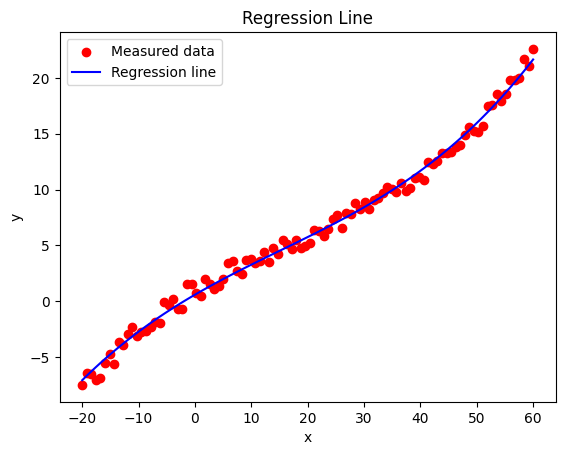

In [63]:
x_org = m_data[:, 0]
y_org = m_data[:, 1]

x = m_data[:, 0]
y = m_data[:, 1]
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

theta = gradient_descent(X, y, theta, alpha, eps)
y_pred = theta.T @ X * y_scale

print(theta)

plt.scatter(x_org, y_org, label='Measured data', color='red')
plt.plot(x_org, y_pred.T, 'blue', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()